# Разработка модели машиного обучения с целью предсказания температуры сплава

# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. 

Построение модели для предсказания температуры сплава на металлургическом комбинате может помочь снизить потребление электроэнергии и оптимизировать производственные расходы. Правильное прогнозирование температуры позволит управлять процессом обработки стали более эффективно и снизить потери материалов.

# Задача проекта

Построить модель, которая будет предсказывать температуры сплава. 

Требование заказчика - рабочая разработанная модель для имитации технологического процесса.

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:
- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

**Файл `data_arc_new.csv` содержит следующие данные:**
- `key` — номер партии;
- `Начало нагрева дугой` — время начала нагрева;
- `Конец нагрева дугой` — время окончания нагрева;
- `Активная мощность` — значение активной мощности;
- `Реактивная мощность` — значение реактивной мощности.

**Файл `data_bulk_new.csv` содержит следующие данные:**
- `key` — номер партии;
- `Bulk 1` … `Bulk 15` — объём подаваемого материала.

**Файл `data_bulk_time_new.csv` содержит следующие данные:**
- `key` — номер партии;
- `Bulk 1` … `Bulk 15` — время подачи материала.

**Файл `data_gas_new.csv` содержит следующие данные:**
- `key` — номер партии;
- `Газ 1` — объём подаваемого газа.

**Файл `data_temp_new.csv` содержит следующие данные:**
- `key` — номер партии;
- `Время замера` — время замера;
- `Температура` — значение температуры.

**Файл `data_wire_new.csv` содержит следующие данные:**
- `key` — номер партии;
- `Wire 1` … `Wire 15` — объём подаваемых проволочных материалов.

**Файл `data_wire_time_new.csv` содержит следующие данные:**
- `key` — номер партии;
- `Wire 1` …`Wire 15` — время подачи проволочных материалов.

# План работы

**Шаг 1. Загрузка данных**

На данном этапе необходимо загрузить данные и выполнить их первичный осмотр.

**Шаг 2. Исследовательский анализ и предобработка данных**

На данном этапе необходимо выполнить исследовательский анализ каждого датафрейма и при необходимости выполнить предобработку. Сделать выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

**Шаг 3. Объединение данных**

На данном этапе необходимо объединить выбранные признаки в один датафрейм по ключу.

**Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма**

На данном этапе необходимо выполнить исследовательский анализ объединённого датафрейма, визуализировать распределения признаков и при необходимости выполнить предобработку. Провести корреляционный анализ.

**Шаг 5. Подготовка данных**

На данном этапе необходимо выполнить подготовку данных для обучения модели. Разделить данные на две выборки, при масштабировании и кодировании учитывать особенности данных и моделей.

**Шаг 6. Обучение моделей машинного обучения**

На данном этапе необходимо обучить как минимум две модели. Хотя бы для одной из них подобрать как минимум два гиперпараметра.

**Шаг 7. Выбор лучшей модели**

На данном этапе необходимо выбрать лучшую модель и проверить её качество на тестовой выборке.

**Шаг 8. Общий вывод и рекомендации заказчику**

На данном этапе необходимо сделать общий вывод о проделанной работе.

## Загрузка данных
На данном этапе необходимо загрузить данные и выполнить их первичный осмотр.

### Импортируем необходимые библиотеки

In [1]:
!pip install -q -U scikit-learn
!pip install -q shap
!pip install -q phik
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import shap
import phik
from time import time

import warnings
warnings.filterwarnings('ignore')

# Задаем константы
RANDOM_STATE = 80424
TEST_SIZE = 0.25

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV

# загружаем нужные модели
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

# загружаем классы для подготовки данных
from sklearn.preprocessing import StandardScaler

# импортируем функции для работы с метриками
from sklearn.metrics import mean_absolute_error

### Загружаем данные и изучаем общую информацию о данных

In [2]:
try:
    data_arc = pd.read_csv('/datasets/data_arc_new.csv', parse_dates=[1, 2], decimal=",")
    data_bulk = pd.read_csv('/datasets/data_bulk_new.csv', decimal=",")
    data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv', parse_dates=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], decimal=",")
    data_gas= pd.read_csv('/datasets/data_gas_new.csv', decimal=",")
    data_temp = pd.read_csv('/datasets/data_temp_new.csv', decimal=",", parse_dates=[1])
    data_wire = pd.read_csv('/datasets/data_wire_new.csv', decimal=",")
    data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv',  parse_dates=[1,2,3,4,5,6,7,8,9], decimal=",")
except:
    data_arc = pd.read_csv('https://code.s3.yandex.net/datasets/data_arc_new.csv', encoding='utf8', decimal=",")
    data_bulk = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_new.csv', encoding='utf8', decimal=",")
    data_bulk_time = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_time_new.csv', encoding='utf8', decimal=",")
    data_gas= pd.read_csv('https://code.s3.yandex.net/datasets/data_gas_new.csv', encoding='utf8', decimal=",")
    data_temp = pd.read_csv('https://code.s3.yandex.net/datasets/data_temp_new.csv', encoding='utf8', decimal=",")
    data_wire = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_new.csv', encoding='utf8', decimal=",")
    data_wire_time = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_time_new.csv', encoding='utf8', decimal=",")

In [3]:
data_arc.head(3)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.30513,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.43046


In [4]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  object        
 4   Реактивная мощность   14876 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
data_bulk.head(3)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0


In [6]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [7]:
data_bulk_time.head(3)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16


In [8]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [9]:
data_gas.head(3)

,key,Газ 1
0,1,29.7499859302
1,2,12.5555609779
2,3,28.5547926192


In [10]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3239 non-null   int64 
 1   Газ 1   3239 non-null   object
dtypes: int64(1), object(1)
memory usage: 50.7+ KB


In [11]:
data_temp.head(3)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0


In [12]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 424.2+ KB


In [13]:
data_wire.head(3)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [15]:
data_wire_time.head(3)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [16]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


### Выводы по загрузке и изучению данных
По первичному осмотру данных, выявлены:
- неверные типы данных у признаков 
- некорректные наименования признаков
- пропуски
- неинформативные данные, в таблицах `data_bulk_time` и `data_wire_time`, которые содержат только значения времени подачи материала

## Исследовательский анализ и предобработка данных

На данном этапе необходимо выполнить исследовательский анализ каждого датафрейма и при необходимости выполнить предобработку. Сделать выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

### Избавимся от неинформативных данных

Отбросим датафреймы `data_bulk_time` и `data_wire_time`, поскольку данные в них не несут ценной для задачи информации.

### Заменим названия столбцов

In [17]:
data_arc.rename(columns = {'Начало нагрева дугой':'begin_arc_heating',
                           'Конец нагрева дугой':'end_arc_heating',
                           'Активная мощность':'active_power',
                           'Реактивная мощность':'reactive_power'},
                inplace=True)
#data_arc.head(1)

In [18]:
data_bulk.rename(columns = {'Bulk 1':'bulk_1',
                           'Bulk 2':'bulk_2',
                           'Bulk 3':'bulk_3',
                           'Bulk 4':'bulk_4',
                           'Bulk 5':'bulk_5',
                           'Bulk 6':'bulk_6',
                           'Bulk 7':'bulk_7',
                           'Bulk 8':'bulk_8',
                           'Bulk 9':'bulk_9',
                           'Bulk 10':'bulk_10',
                           'Bulk 11':'bulk_11',
                           'Bulk 12':'bulk_12',
                           'Bulk 13':'bulk_13',
                           'Bulk 14':'bulk_14',
                           'Bulk 15':'bulk_15'},
                inplace=True)
#data_bulk.head(1)

In [19]:
data_gas.rename(columns = {'Газ 1':'gaz_1'}, inplace=True)
#data_gas.head(1)

In [20]:
data_temp.rename(columns = {'Время замера':'time_measuring',
                            'Температура':'temp'},
                inplace=True)
#data_temp.head(1)

In [21]:
data_wire.rename(columns = {'Wire 1':'wire_1',
                            'Wire 2':'wire_2',
                            'Wire 3':'wire_3',
                            'Wire 4':'wire_4',
                            'Wire 5':'wire_5',
                            'Wire 6':'wire_6',
                            'Wire 7':'wire_7',
                            'Wire 8':'wire_8',
                            'Wire 9':'wire_9'},
                 inplace=True)
#data_wire.head(1)

### Обработаем пропуски в данных

In [22]:
data_bulk.isna().sum()

key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

Оставим столбцы `bulk_12`, `bulk_14`, `bulk_15`. Пропущенные значения в данных столбцах заменим на 0. Остальные столбцы удалим, так как количество пропущенных значений в них превышает половину и не несут нужной информации.

In [23]:
data_bulk = data_bulk[['key', 'bulk_12', 'bulk_14', 'bulk_15']]
data_bulk = data_bulk.fillna(0)
#data_bulk.info()

In [24]:
data_temp.isna().sum()

key                  0
time_measuring       0
temp              3427
dtype: int64

In [25]:
print('Процент пропусков в столбце "temp":', round(data_temp['temp'].isna().sum()/data_temp['key'].count()*100, 2),'%')

Процент пропусков в столбце "temp": 18.94 %


Пропусков в столбце со значениями температуры получилось 18,94%. Заменить данные пропуски медианным, средним значением или нулем нецелесообразно. Поэтому, приму решение - удалить строки с пропусками.

In [26]:
data_temp = data_temp.dropna(subset=['temp'])
#data_temp.info()

In [27]:
data_temp

,key,time_measuring,temp
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18061,3237,2019-09-06 11:31:15,1569.0
18067,3238,2019-09-06 12:16:15,1584.0
18071,3239,2019-09-06 14:16:50,1598.0
18080,3240,2019-09-06 15:25:21,1617.0


In [28]:
data_wire.isna().sum()

key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

Оставим столбец `wire_1`. Пропущенные значения в данном столбце заменим на 0. Остальные столбцы удалим, так как количество пропущенных значений в них превышает половину и не несут нужной информации.

In [29]:
data_wire = data_wire[['key', 'wire_1']]
data_wire = data_wire.fillna(0)
#data_wire.info()

### Преобразуем данные в нужные типы

In [30]:
data_arc['active_power']=data_arc['active_power'].astype('float64')
data_arc['reactive_power']=data_arc['reactive_power'].astype('float64')
#data_arc.info()

In [31]:
for i in data_bulk[['bulk_12',
                    'bulk_14',
                    'bulk_15']]:
    data_bulk[i] = data_bulk[i].astype('float32')
#data_bulk.info()

In [32]:
data_gas['gaz_1'] = data_gas['gaz_1'].astype('float64')
#data_gas.info()

In [33]:
data_temp['temp'] = data_temp['temp'].astype('float64')
#data_temp.info()

In [34]:
data_wire['wire_1'] = data_wire['wire_1'].astype('float64')
#data_wire.info()

### Проверим данные на наличие явных дубликатов

In [35]:
for i in [data_arc, data_bulk, data_gas, data_temp, data_wire]:
    print('Количество дубликатов для каждого датафрейма:', i.duplicated().sum())

Количество дубликатов для каждого датафрейма: 0
Количество дубликатов для каждого датафрейма: 0
Количество дубликатов для каждого датафрейма: 0
Количество дубликатов для каждого датафрейма: 0
Количество дубликатов для каждого датафрейма: 0


### Введем новые признаки

- У датасета `data_arc` имеются два признака, которые отвечают за время начала и окончания нагрева. Вычислим общее время нагрева, выразив его в секундах, чтобы в дальнейшем изучить распределение данного признака. Назовем данный признак `arc_heating_sec`.

In [36]:
data_arc['arc_heating_sec'] = data_arc['end_arc_heating'] - data_arc['begin_arc_heating']
data_arc['arc_heating_sec'] = data_arc['arc_heating_sec'].dt.seconds

- Также у датасета `data_arc` имеются два признака, которые отвечают за значения активной и реактивной мощностей. Вычислим полную мощность. *Полная мощность — это вся мощность, которая потребляется электроприбором. Она включает в себя как активную составляющую, так и реактивную, которая определяется типом используемой в цепи нагрузки.* Полная мощность вычисляется как квадратный корень из суммы квадратов активной и реактивной мощностей. Назовем данный признак `full_power`.

In [37]:
data_arc['full_power'] = (data_arc['active_power']**2 + data_arc['reactive_power']**2)**0.5

- Зная полную мощность и время, можно рассчитать энергию, затраченную на нагрев. Энергия вычисляется как произведение полной мощности на время в секундах. Назовем данный признак `energy`.

In [38]:
data_arc['energy'] = data_arc['full_power'] * data_arc['arc_heating_sec']
#data_arc.head(3)

- Сгруппируем данные по номеру партии, суммировав все значения и обозначив столбец `rounds`, как количество раундов в одной партии. 
- В итоговой таблице оставим значения активной, реактивной, полной мощностей, время нагрева в секундах, энергии и количество раундов в одной партии.

In [39]:
data_arc = data_arc[['key', 'active_power', 'reactive_power', 'arc_heating_sec', 'full_power', 'energy']]

In [40]:
rounds = data_arc['key'].value_counts().reset_index(name='rounds').rename(columns={'index': 'key'})

In [41]:
data_arc = data_arc.groupby(by = 'key').sum()
data_arc = data_arc.merge(rounds, on = 'key')
data_arc.head()

,key,active_power,reactive_power,arc_heating_sec,full_power,energy,rounds
0,1,3.036730,2.142821,1098,3.718736,770.282114,5
1,2,2.139408,1.453357,811,2.588349,481.760005,4
2,3,4.063641,2.937457,655,5.019223,722.837668,5
3,4,2.706489,2.056992,741,3.400038,683.455597,4
4,5,2.252950,1.687991,869,2.816980,512.169934,4


- Добавим в датасет `data_temp` столбец со значениями времени первого и последнего замера раундов одной партии, остальные отбросим. Назовем их: `begin_time`, `end_time`. И добавим столбец `diff_time` с разницей времени в секундах первого и последнего замера раундов одной партии.
- Также добавим столбец со значениями температуры первого и последнего замера раундов одной партии остальные отбросим. Назовем их: `begin_temp`, `end_temp`. И добавим столбец `diff_temp` с разницей температур первого и последнего замера раундов одной партии.

In [42]:
data_temp = data_temp.groupby(by='key').agg(['first', 'last']).reset_index()
data_temp.columns = ['key', 'begin_time', 'end_time', 'begin_temp', 'end_temp']

In [43]:
data_temp['diff_time'] = data_temp['end_time'] - data_temp['begin_time']
data_temp['diff_time'] = data_temp['diff_time'].dt.seconds
data_temp['diff_temp'] = data_temp['end_temp'] - data_temp['begin_temp']
data_temp.head()

,key,begin_time,end_time,begin_temp,end_temp,diff_time,diff_temp
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0,1714,42.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0,1265,21.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0,1753,3.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0,1220,24.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0,1536,26.0


In [44]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         3216 non-null   int64         
 1   begin_time  3216 non-null   datetime64[ns]
 2   end_time    3216 non-null   datetime64[ns]
 3   begin_temp  3216 non-null   float64       
 4   end_temp    3216 non-null   float64       
 5   diff_time   3216 non-null   int64         
 6   diff_temp   3216 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 176.0 KB


### Посмотрим на распределение данных

#### Распределение данных датасета `data_arc`

In [45]:
data_arc.describe()

,key,active_power,reactive_power,arc_heating_sec,full_power,energy,rounds
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1623.061294,3.067549,2.031849,794.579029,4.033393,679.833995,4.628500
std,934.739859,1.208554,12.665145,332.448622,12.685867,1403.260065,1.608647
min,1.000000,0.267676,-713.966032,57.000000,0.331897,33.430208,1.000000
25%,817.250000,2.236770,1.630658,571.000000,2.776480,444.891384,4.000000
50%,1623.500000,2.984581,2.176833,770.000000,3.694998,620.118463,4.000000
75%,2431.750000,3.775472,2.788330,983.000000,4.697535,828.007623,6.000000
max,3241.000000,12.375636,8.949049,4189.000000,717.937368,78258.076839,16.000000


In [46]:
data_arc.query('reactive_power < 0')

,key,active_power,reactive_power,arc_heating_sec,full_power,energy,rounds
2097,2116,2.636797,-713.966032,433,717.937368,78258.076839,4


По распределению признака `reactive_power`, можно отметить выброс со значением -715.479924. Удалим строку с данным значением.

In [47]:
data_arc = data_arc.query('reactive_power >= 0')
data_arc.shape

(3213, 7)

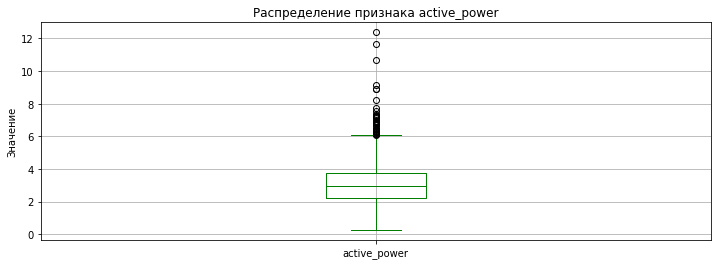

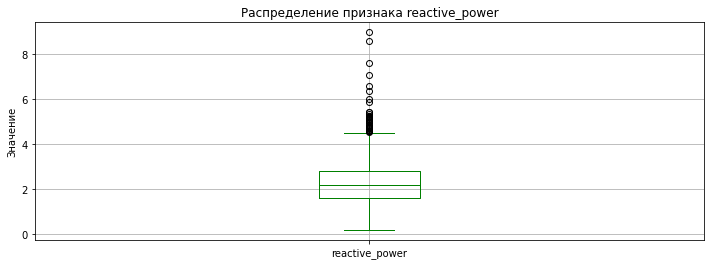

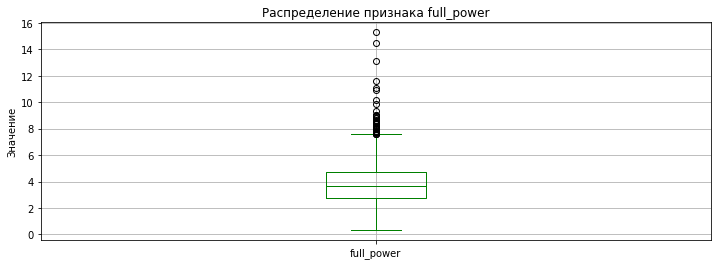

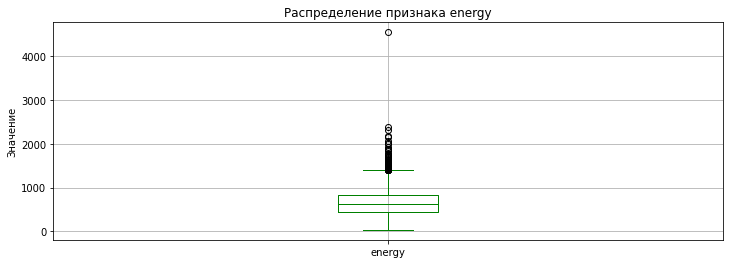

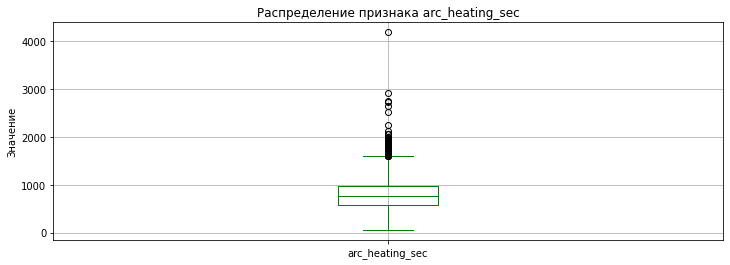

In [48]:
for i in data_arc[['active_power', 'reactive_power', 'full_power', 'energy', 'arc_heating_sec']]:
    data_arc[i].plot(kind='box', grid=True, title= f'Распределение признака {i}', color='green', figsize=(12,4));
    plt.ylabel('Значение')
    plt.show()

Остальные выбросы пока оставим, их значения не слишком аномально высокие. Возможно, для последующего обучения моделей, данные выбросы позволят не переобучиться и учитывать такие нюасы. 

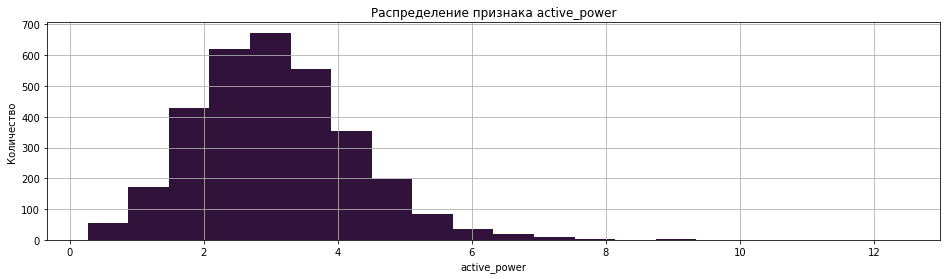

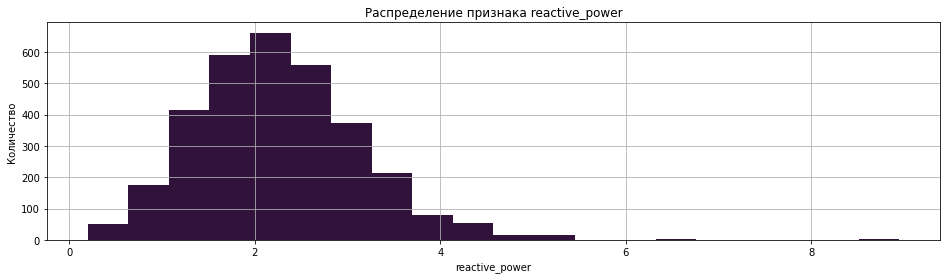

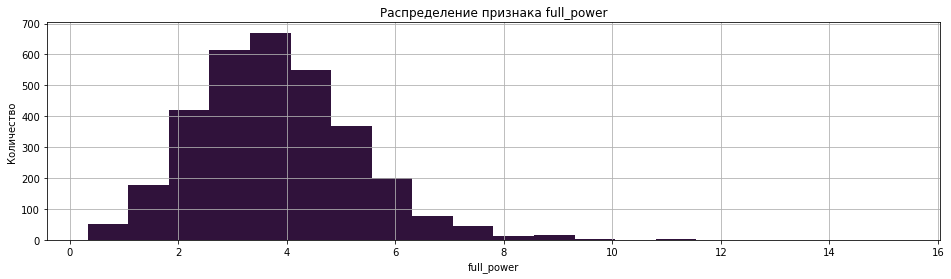

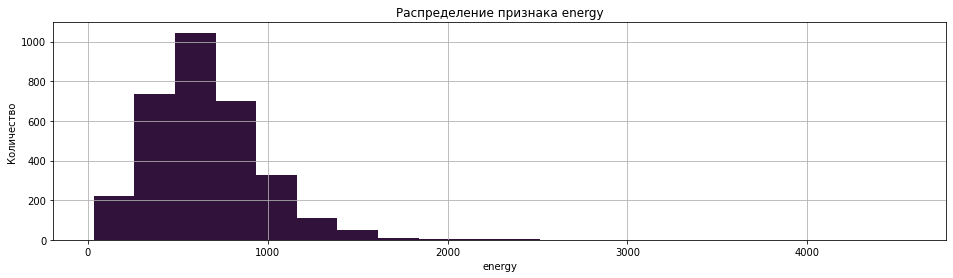

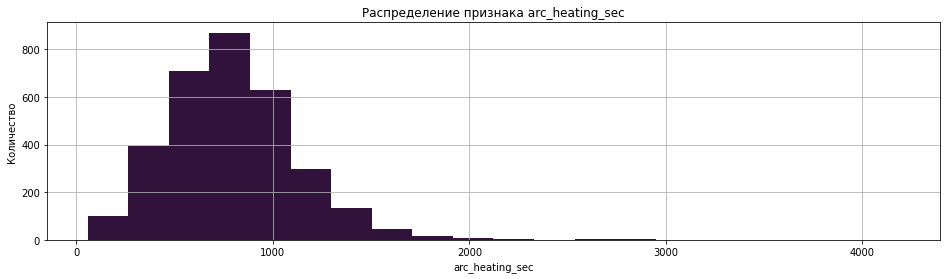

In [49]:
for i in data_arc[['active_power', 'reactive_power', 'full_power', 'energy', 'arc_heating_sec']]:
    data_arc[i].plot(kind='hist', grid=True, bins = 20, title= f'Распределение признака {i}', colormap="turbo", figsize=(16,4));
    plt.ylabel('Количество')
    plt.xlabel(i)
    plt.show()

По гистограмам видно смещение по правую сторону, это те самые незначительные выбросы, которые мы оставили. 

#### Распределение данных датасета `data_bulk`

In [50]:
data_bulk.describe()

,key,bulk_12,bulk_14,bulk_15
count,3129.000000,3129.000000,3129.000000,3129.000000
mean,1624.383509,203.948227,152.706619,115.319275
std,933.337642,151.419632,81.091423,84.488701
min,1.000000,0.000000,0.000000,0.000000
25%,816.000000,105.000000,104.000000,0.000000
50%,1622.000000,206.000000,148.000000,106.000000
75%,2431.000000,263.000000,202.000000,204.000000
max,3241.000000,1849.000000,636.000000,405.000000


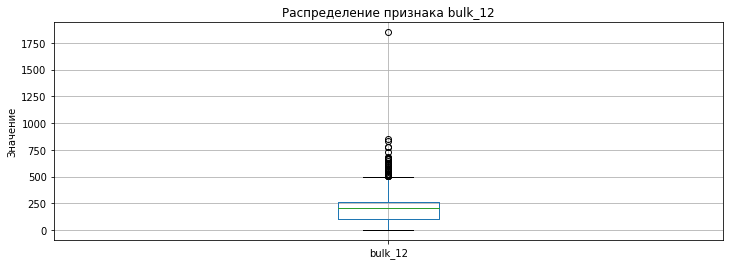

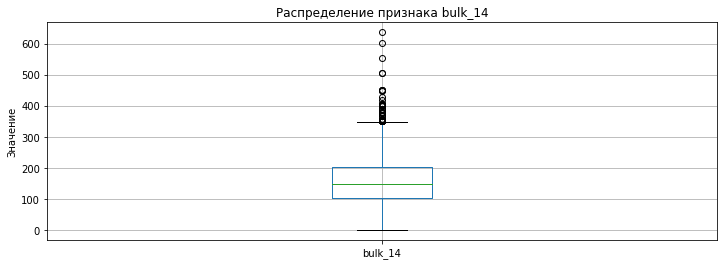

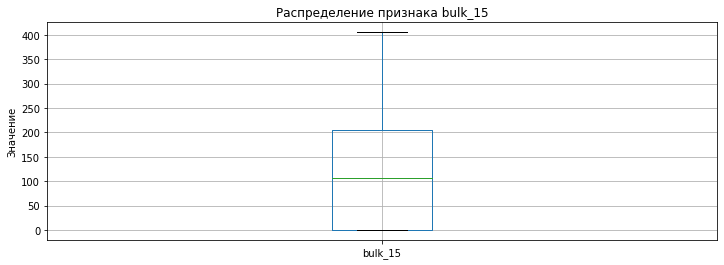

In [51]:
for i in data_bulk[['bulk_12', 'bulk_14', 'bulk_15']]:
    data_bulk[i].plot(kind='box', grid=True, title= f'Распределение признака {i}', figsize=(12,4));
    plt.ylabel('Значение')
    plt.show()

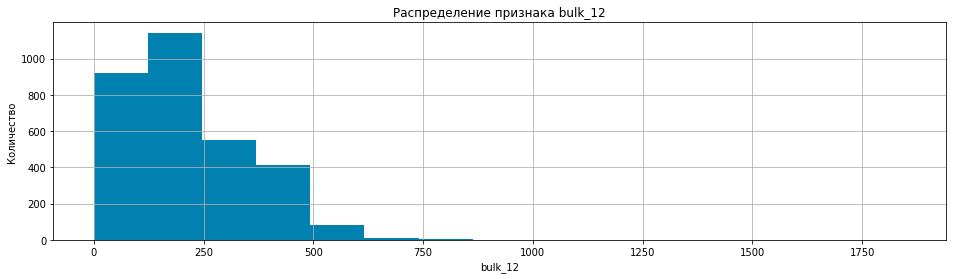

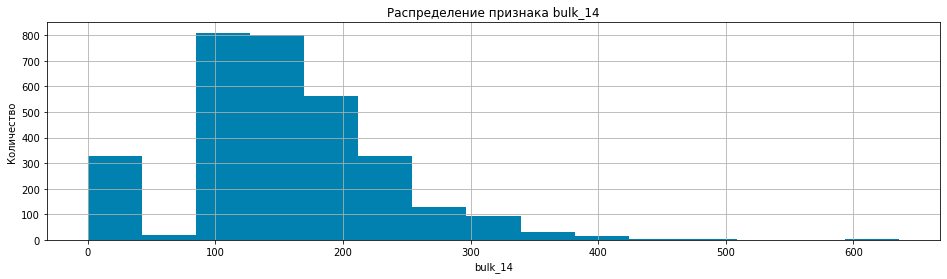

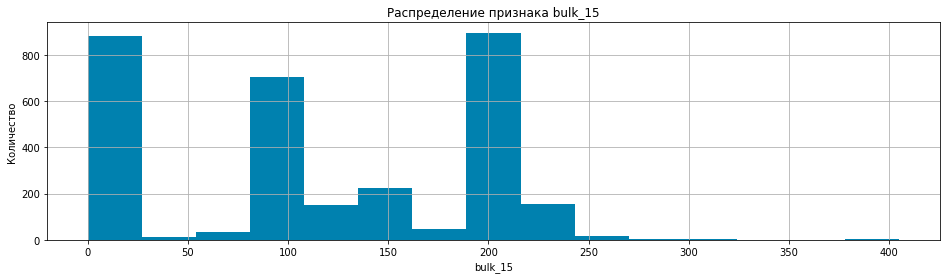

In [52]:
for i in data_bulk[['bulk_12', 'bulk_14', 'bulk_15']]:
    data_bulk[i].plot(kind='hist', grid=True, bins = 15, title= f'Распределение признака {i}', color='#0081AF', figsize=(16,4));
    plt.ylabel('Количество')
    plt.xlabel(i)
    plt.show()

Выбросы оставим, их значения не слишком аномально высокие. Возможно, для последующего обучения моделей, данные выбросы позволят не переобучиться и учитывать такие нюасы. 

#### Распределение данных датасета `data_gas`

In [53]:
data_gas.describe()

,key,gaz_1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


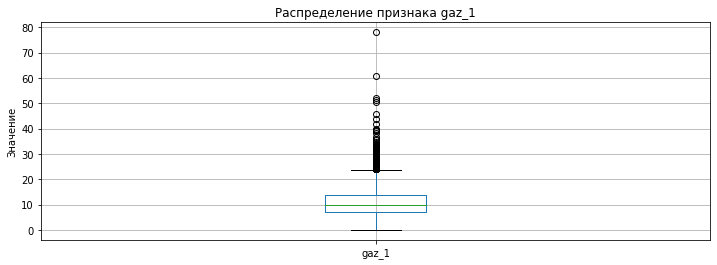

In [54]:
data_gas['gaz_1'].plot(kind='box', grid=True, title= f'Распределение признака gaz_1', figsize=(12,4));
plt.ylabel('Значение')
plt.show()

Выбросы оставим, их значения не слишком аномально высокие. Возможно, для последующего обучения моделей, данные выбросы позволят не переобучиться и учитывать такие нюасы. 

#### Распределение данных датасета `data_temp`

In [55]:
data_temp.describe()

,key,begin_temp,end_temp,diff_time,diff_temp
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1622.199316,1588.592040,1593.928483,1755.354167,5.336443
std,935.088523,29.137454,19.874627,1541.081369,24.342501
min,1.000000,1191.000000,1204.000000,0.000000,-98.000000
25%,815.750000,1572.000000,1585.000000,804.750000,-3.000000
50%,1622.500000,1588.000000,1593.000000,1706.500000,0.000000
75%,2431.250000,1606.000000,1600.000000,2459.750000,17.000000
max,3241.000000,1684.000000,1700.000000,23674.000000,408.000000


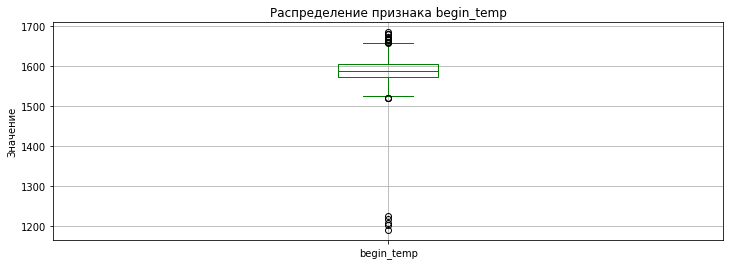

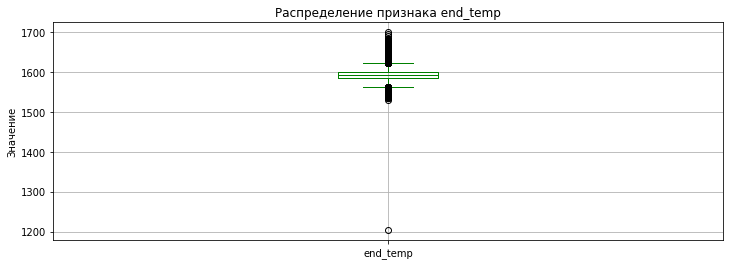

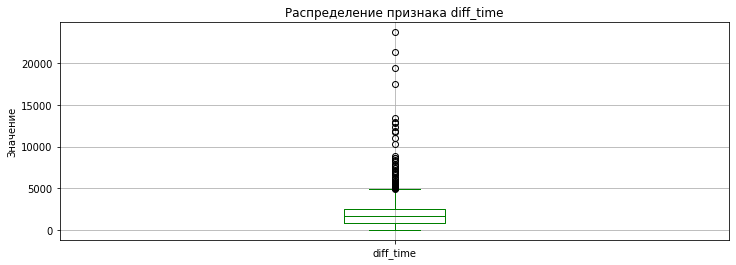

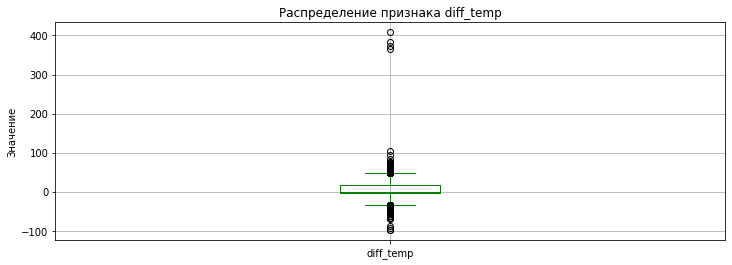

In [56]:
for i in data_temp[['begin_temp', 'end_temp', 'diff_time', 'diff_temp']]:
    data_temp[i].plot(kind='box', grid=True, title= f'Распределение признака {i}', color='green', figsize=(12,4));
    plt.ylabel('Значение')
    plt.show()

По распределению признаков `begin_temp`, `end_temp`, можно отметить аномальные значения меньше 1400. Удалим строки с данными значениями. При температуре менее 1400 начинается уже процесс кристаллизации, поэтому от таких данных лучше избавиться. 

In [57]:
data_temp.query('begin_temp < 1400')

,key,begin_time,end_time,begin_temp,end_temp,diff_time,diff_temp
855,867,2019-06-06 08:03:39,2019-06-06 08:48:23,1191.0,1599.0,2684,408.0
1201,1214,2019-06-18 08:01:03,2019-06-18 08:43:56,1208.0,1591.0,2573,383.0
1604,1619,2019-07-03 02:34:41,2019-07-03 02:43:59,1218.0,1590.0,558,372.0
2036,2052,2019-07-25 08:49:15,2019-07-25 09:27:03,1227.0,1592.0,2268,365.0
2538,2561,2019-08-12 18:49:29,2019-08-12 18:49:29,1204.0,1204.0,0,0.0


In [58]:
data_temp.query('end_temp < 1400')

,key,begin_time,end_time,begin_temp,end_temp,diff_time,diff_temp
2538,2561,2019-08-12 18:49:29,2019-08-12 18:49:29,1204.0,1204.0,0,0.0


In [59]:
data_temp = data_temp.query('begin_temp > 1400')
data_temp = data_temp.query('end_temp > 1400')
data_temp.shape

(3211, 7)

Посмотрим на партии, начиная с 2500.

In [60]:
data_temp.query('key > 2500')

,key,begin_time,end_time,begin_temp,end_temp,diff_time,diff_temp
2478,2501,2019-08-10 14:41:14,2019-08-10 14:41:14,1587.0,1587.0,0,0.0
2479,2502,2019-08-10 15:39:39,2019-08-10 15:39:39,1583.0,1583.0,0,0.0
2480,2503,2019-08-10 16:27:44,2019-08-10 16:27:44,1603.0,1603.0,0,0.0
2481,2504,2019-08-10 17:31:43,2019-08-10 17:31:43,1583.0,1583.0,0,0.0
2482,2505,2019-08-10 18:14:52,2019-08-10 18:14:52,1606.0,1606.0,0,0.0
...,...,...,...,...,...,...,...
3211,3237,2019-09-06 11:31:15,2019-09-06 11:31:15,1569.0,1569.0,0,0.0
3212,3238,2019-09-06 12:16:15,2019-09-06 12:16:15,1584.0,1584.0,0,0.0
3213,3239,2019-09-06 14:16:50,2019-09-06 14:16:50,1598.0,1598.0,0,0.0
3214,3240,2019-09-06 15:25:21,2019-09-06 15:25:21,1617.0,1617.0,0,0.0


Можно заметить, что значения `begin_temp` и `end_temp` совпадают, а значения `diff_time` и `diff_temp` вовсе равны 0. Уберем данные строки.

In [61]:
data_temp = data_temp.query('key < 2500')
data_temp.shape

(2473, 7)

Остальные выбросы пока оставим, их значения не слишком аномально высокие. Возможно, для последующего обучения моделей, данные выбросы позволят не переобучиться и учитывать такие нюасы. 

#### Распределение данных датасета `data_wire`

In [62]:
data_wire.describe()

,key,wire_1
count,3081.000000,3081.000000
mean,1623.426485,100.044411
std,932.996726,42.841120
min,1.000000,0.000000
25%,823.000000,70.281120
50%,1619.000000,100.114563
75%,2434.000000,125.798405
max,3241.000000,330.314424


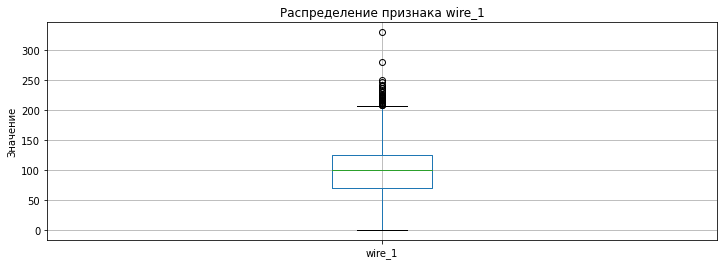

In [63]:
data_wire['wire_1'].plot(kind='box', grid=True, title= f'Распределение признака wire_1', figsize=(12,4));
plt.ylabel('Значение')
plt.show()

Выбросы оставим, их значения не слишком аномально высокие. Возможно, для последующего обучения моделей, данные выбросы позволят не переобучиться и учитывать такие нюасы. 

### Выводы по исследовательскому анализу и предобработке данных

В ходе исследовательского анализа и предобработки данных были получены следующие результаты:
- Отброшены датафреймы `data_bulk_time` и `data_wire_time`, поскольку данные в них не несут ценной для задачи информации.
- Привели названия столбцов к стандартному виду.
- Обработаны пропуски в данных:
  - Оставлены столбцы `bulk_12`, `bulk_14`, `bulk_15`. Пропущенные значения в данных столбцах заменили на 0. Остальные столбцы удалили, так как количество пропущенных значений в них превышает половину и не несут нужной информации.
  - Пропусков в столбце со значениями температуры получилось 18,94%. Заменить данные пропуски медианным, средним значением или нулем нецелесообразно. Поэтому, приняла решение - удалить строки с пропусками.
  - Оставлен столбец `wire_1`. Пропущенные значения в данном столбце заменили на 0. Остальные столбцы удалили, так как количество пропущенных значений в них превышает половину и не несут нужной информации.
- Преобразовали данные в нужные типы.
- Проверили данные на наличие явных дубликатов.
- Введели новые признаки:
  - `rc_heating_sec` -  общее время нагрева в секундах;
  - `full_power` - полная мощность;
  - `energy` - энергия;
  - `rounds` - количество раундов в одной партии;
  - `begin_time` -  значения времени первого замера раундов одной партии;
  - `end_time` - значения последнего замера раундов одной партии;
  - `diff_time` - разница времени в секундах первого и последнего замера раундов одной партии;
  - `begin_temp` - значения температуры первого замера раундов одной партии;
  - `end_temp` - значения температуры последнего замера раундов одной партии (целевой признак);
  - `diff_temp` - разница температур первого и последнего замера раундов одной партии.
- Посмотрели на распределение данных:
  - По распределению признака `reactive_power`, отметили выброс со значением -715.479924. Удалили строку с данным значением.
   - По распределению признака `temp`, отметили аномальные значения меньше 1400. Удалили строки с данными значениями.
  - Значения `begin_temp` и `end_temp` совпадают, а значения `diff_time` и `diff_temp` вовсе равны 0. Удалили строки с данными значениями.
  - Остальные выбросы пока оставили, их значения не слишком аномально высокие. Возможно, для последующего обучения моделей, данные выбросы позволят не переобучиться и учитывать такие нюасы.

## Объединение данных

На данном этапе необходимо объединить выбранные признаки в один датафрейм по ключу.

In [64]:
data = data_arc.merge(data_bulk, on='key', how='left')
data = data.merge(data_gas, on='key', how='left')
data = data.merge(data_temp, on='key', how='left')
data = data.merge(data_wire, on='key', how='left')

In [65]:
data = data.set_index('key')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 1 to 3241
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   active_power     3213 non-null   float64       
 1   reactive_power   3213 non-null   float64       
 2   arc_heating_sec  3213 non-null   int64         
 3   full_power       3213 non-null   float64       
 4   energy           3213 non-null   float64       
 5   rounds           3213 non-null   int64         
 6   bulk_12          3127 non-null   float32       
 7   bulk_14          3127 non-null   float32       
 8   bulk_15          3127 non-null   float32       
 9   gaz_1            3211 non-null   float64       
 10  begin_time       2470 non-null   datetime64[ns]
 11  end_time         2470 non-null   datetime64[ns]
 12  begin_temp       2470 non-null   float64       
 13  end_temp         2470 non-null   float64       
 14  diff_time        2470 non-null   float64

In [67]:
data.head(3)

,active_power,reactive_power,arc_heating_sec,full_power,energy,rounds,bulk_12,bulk_14,bulk_15,gaz_1,begin_time,end_time,begin_temp,end_temp,diff_time,diff_temp,wire_1
key,,,,,,,,,,,,,,,,,
1,3.036730,2.142821,1098,3.718736,770.282114,5,206.0,150.0,154.0,29.749986,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0,1714.0,42.0,60.059998
2,2.139408,1.453357,811,2.588349,481.760005,4,206.0,149.0,154.0,12.555561,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0,1265.0,21.0,96.052315
3,4.063641,2.937457,655,5.019223,722.837668,5,205.0,152.0,153.0,28.554793,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0,1753.0,3.0,91.160157


In [68]:
data.tail(3)

,active_power,reactive_power,arc_heating_sec,full_power,energy,rounds,bulk_12,bulk_14,bulk_15,gaz_1,begin_time,end_time,begin_temp,end_temp,diff_time,diff_temp,wire_1
key,,,,,,,,,,,,,,,,,
3239,4.848005,3.541541,1216,6.01448,941.538764,8,158.0,270.0,88.0,16.023518,NaT,NaT,NaN,NaN,NaN,NaN,143.357761
3240,3.317679,2.373552,839,4.08292,657.439848,5,0.0,192.0,54.0,11.863103,NaT,NaT,NaN,NaN,NaN,NaN,34.070400
3241,3.045283,2.140011,659,3.72288,538.258300,5,0.0,180.0,52.0,12.680959,NaT,NaT,NaN,NaN,NaN,NaN,63.117595


Избавимся от признаков, по которым незначительное количество данных по партиям.

In [69]:
data = data.dropna()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 1 to 2499
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   active_power     2324 non-null   float64       
 1   reactive_power   2324 non-null   float64       
 2   arc_heating_sec  2324 non-null   int64         
 3   full_power       2324 non-null   float64       
 4   energy           2324 non-null   float64       
 5   rounds           2324 non-null   int64         
 6   bulk_12          2324 non-null   float32       
 7   bulk_14          2324 non-null   float32       
 8   bulk_15          2324 non-null   float32       
 9   gaz_1            2324 non-null   float64       
 10  begin_time       2324 non-null   datetime64[ns]
 11  end_time         2324 non-null   datetime64[ns]
 12  begin_temp       2324 non-null   float64       
 13  end_temp         2324 non-null   float64       
 14  diff_time        2324 non-null   float64

### Выводы по объединению данных

- Были объеденены в один датасет `data` следующие датасеты по ключевому признаку `key`: `data_arc`, `data_bulk`, `data_gas`, `data_temp`, `data_wire`.
- Были отмечены пропуски в данных, в дальнейшем избавимся от них.

## Исследовательский анализ и предобработка данных объединённого датафрейма

На данном этапе необходимо выполнить исследовательский анализ объединённого датафрейма, визуализировать распределения признаков и при необходимости выполнить предобработку. Провести корреляционный анализ.

### Обработаем пропуски в данных объединённого датафрейма

In [71]:
data = data.dropna()
data.shape

(2324, 17)

### Проверим данные объединённого датафрейма на наличие явных дубликатов

In [72]:
data.duplicated().sum()

0

### Посмотрим на распределение данных объединённого датафрейма

In [73]:
data.describe()

,active_power,reactive_power,arc_heating_sec,full_power,energy,rounds,bulk_12,bulk_14,bulk_15,gaz_1,begin_temp,end_temp,diff_time,diff_temp,wire_1
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,3.126327,2.301280,808.196644,3.886143,670.232396,4.696644,208.597672,153.952667,120.078316,11.378854,1587.368761,1593.372633,2323.682014,6.003873,102.423900
std,1.220484,0.903711,340.813828,1.517584,319.526707,1.606210,157.112122,81.410545,84.655968,6.397008,23.627590,11.207457,1385.809791,22.890830,43.540975
min,0.267676,0.196228,57.000000,0.331897,33.430208,1.000000,0.000000,0.000000,0.000000,0.008399,1519.000000,1541.000000,339.000000,-98.000000,0.000000
25%,2.295960,1.671099,581.000000,2.846893,457.924990,4.000000,105.000000,105.000000,0.000000,7.282534,1571.000000,1587.000000,1580.500000,-9.000000,73.204559
50%,3.036516,2.225900,778.000000,3.770584,631.228863,5.000000,206.000000,149.000000,107.000000,10.100687,1587.000000,1593.000000,2046.500000,7.000000,101.103600
75%,3.834302,2.829180,993.000000,4.769753,841.824214,6.000000,283.000000,204.000000,204.000000,14.218487,1603.000000,1598.000000,2793.500000,22.000000,128.075222
max,12.375636,8.949049,4189.000000,15.288271,4546.405812,16.000000,1849.000000,636.000000,405.000000,77.995040,1660.000000,1653.000000,23674.000000,83.000000,330.314424


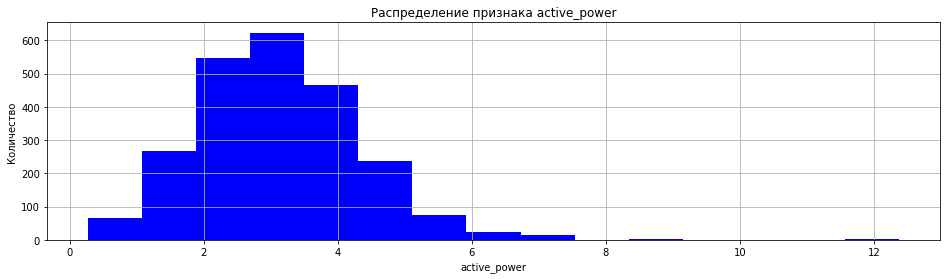

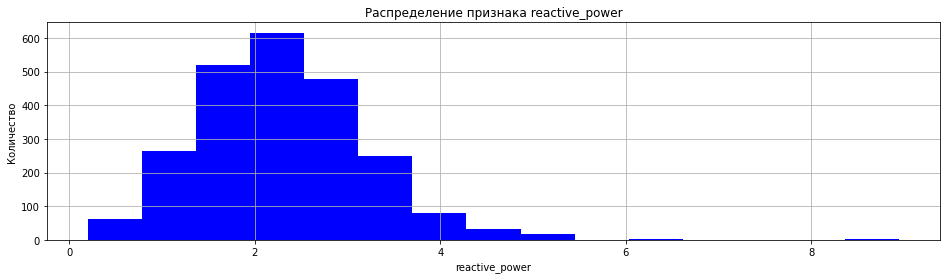

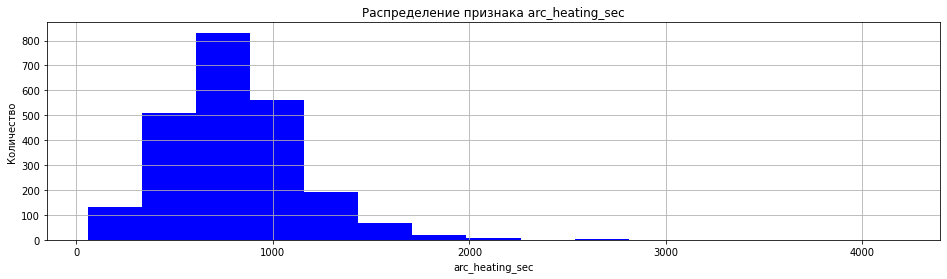

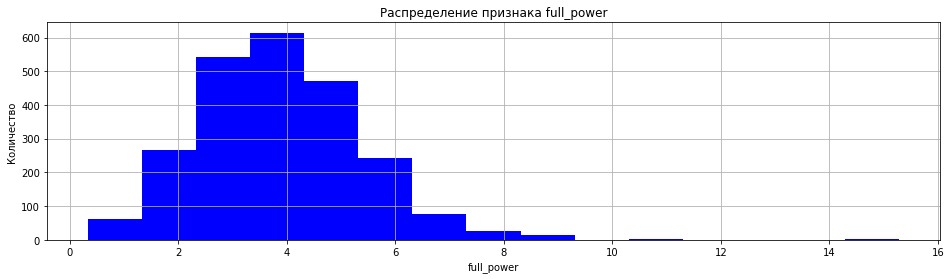

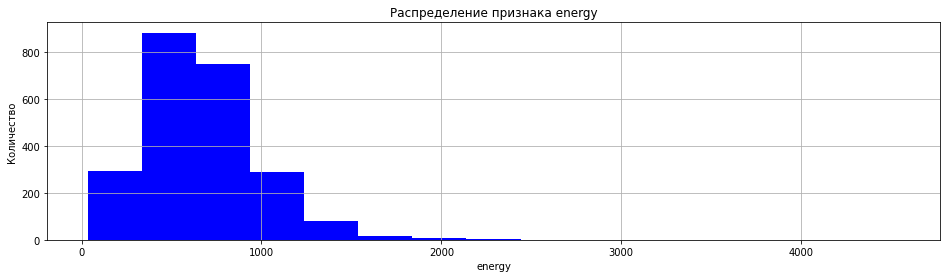

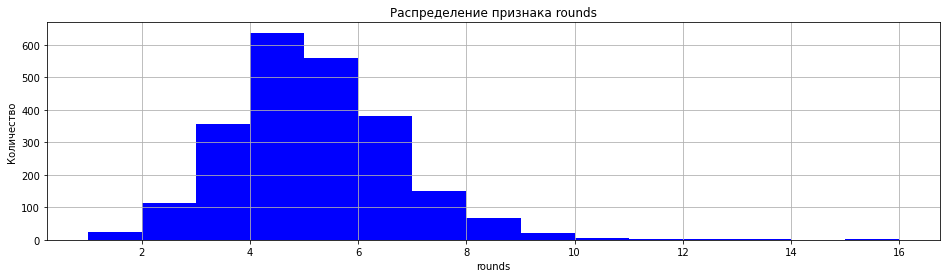

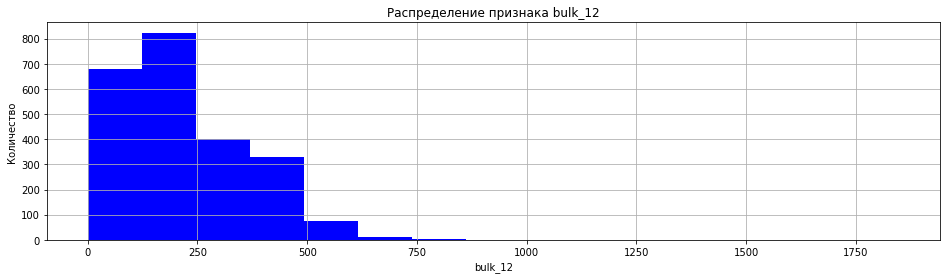

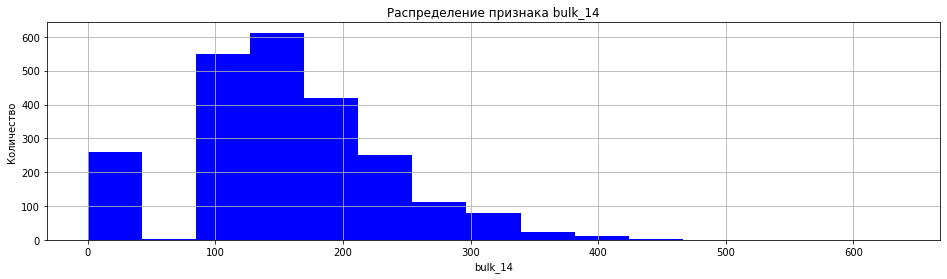

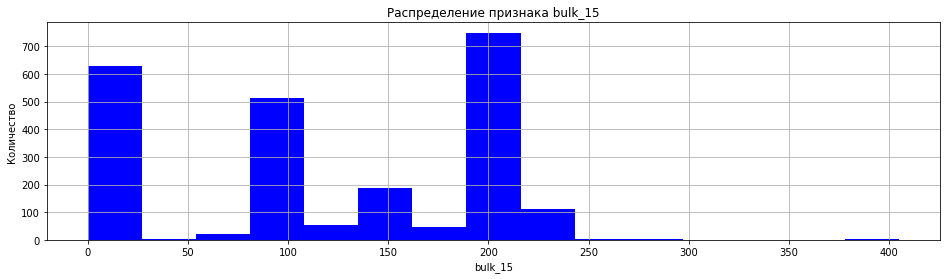

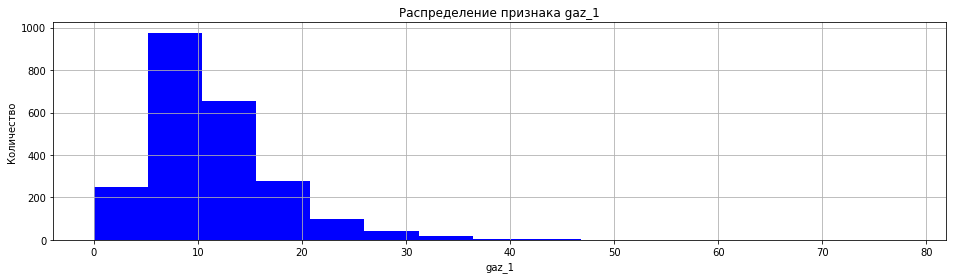

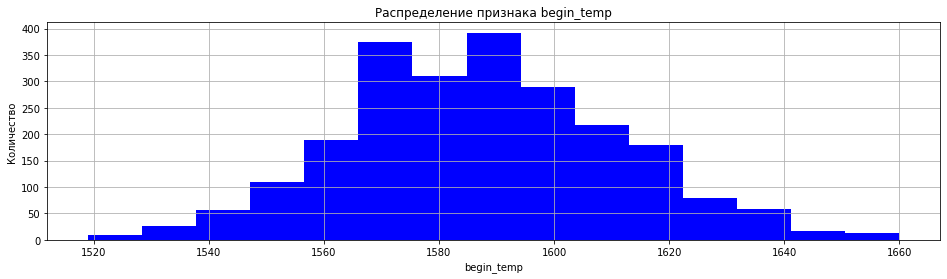

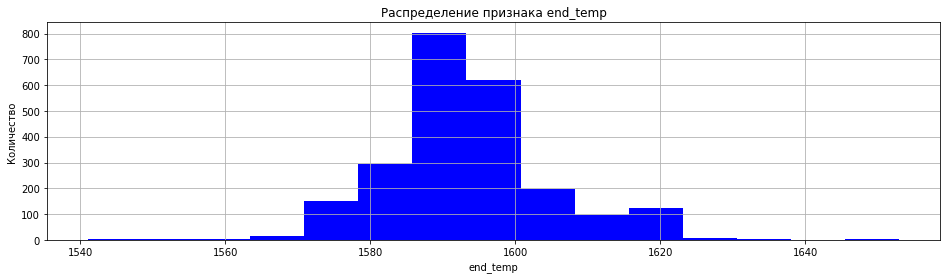

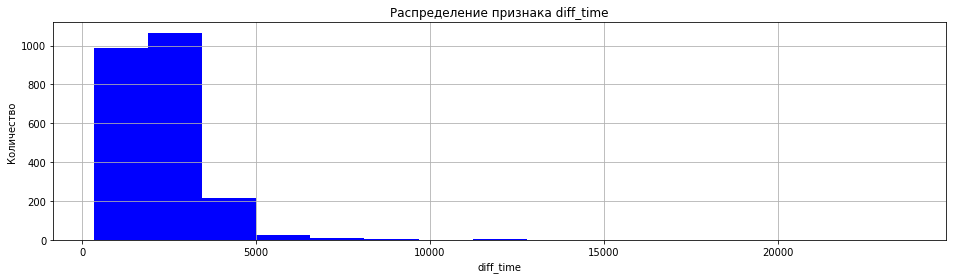

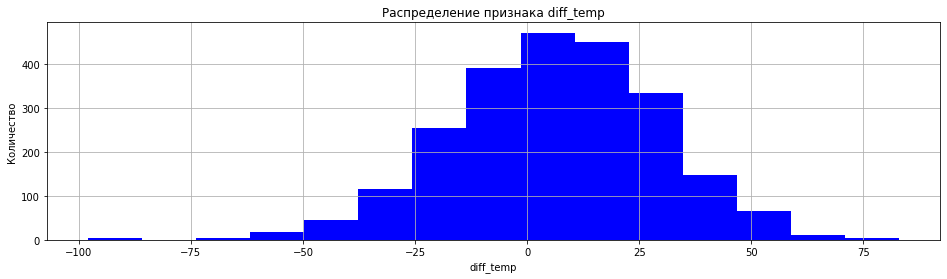

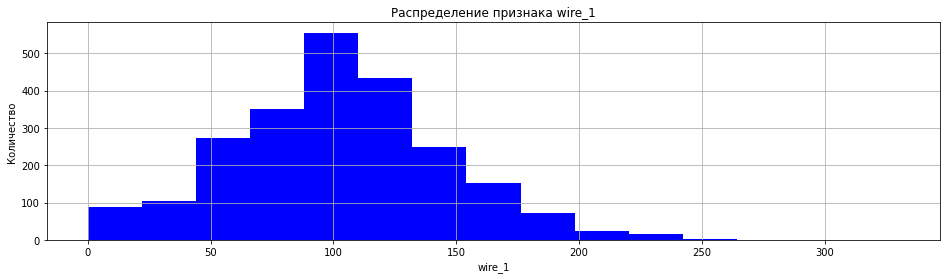

In [74]:
for i in data[['active_power', 'reactive_power', 'arc_heating_sec', 'full_power', 'energy', 'rounds', 'bulk_12', 'bulk_14', 'bulk_15', 'gaz_1', 'begin_temp', 'end_temp', 'diff_time', 'diff_temp', 'wire_1']]:
    data[i].plot(kind='hist', grid=True, bins = 15, title= f'Распределение признака {i}', color='blue', figsize=(16,4));
    plt.ylabel('Количество')
    plt.xlabel(i)
    plt.show()

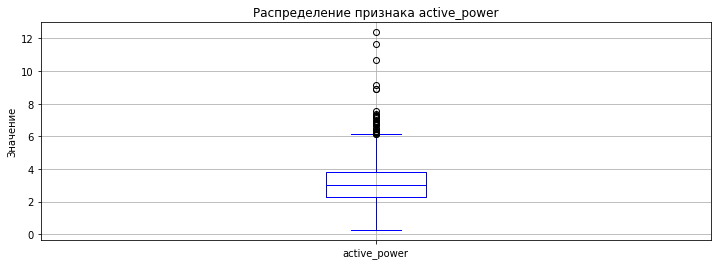

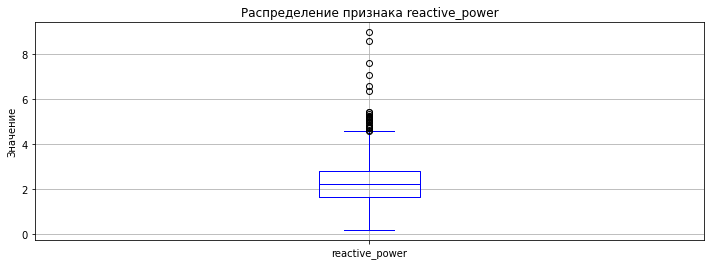

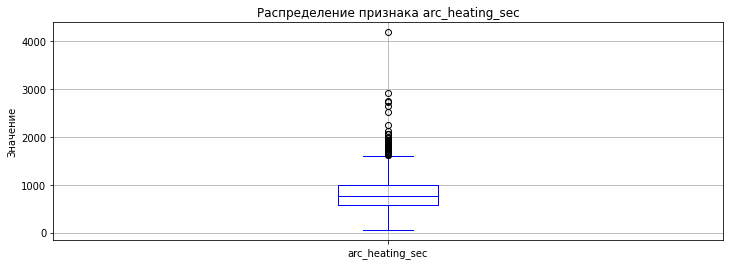

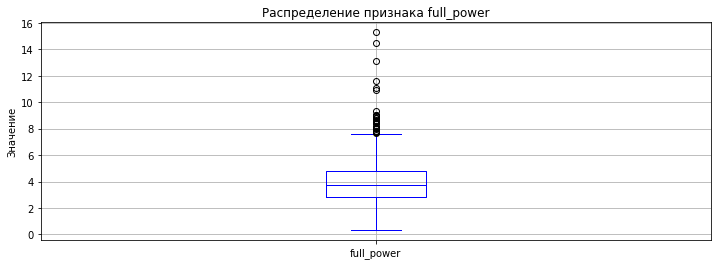

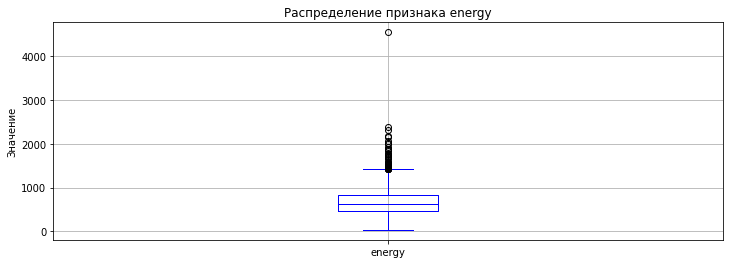

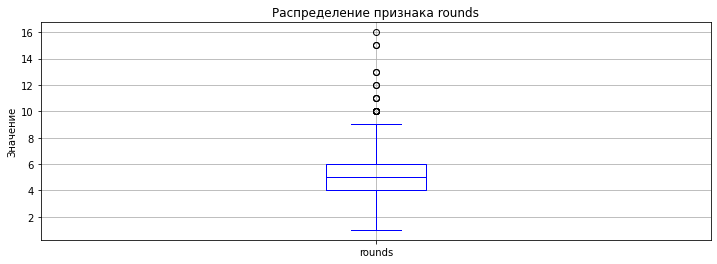

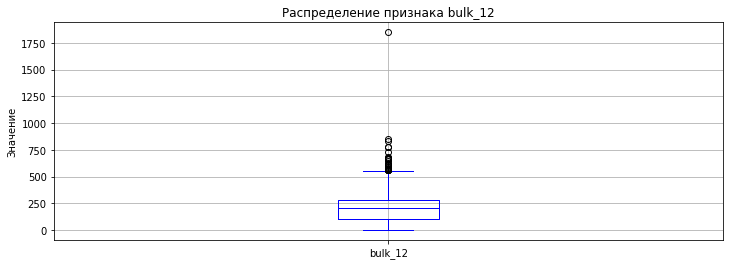

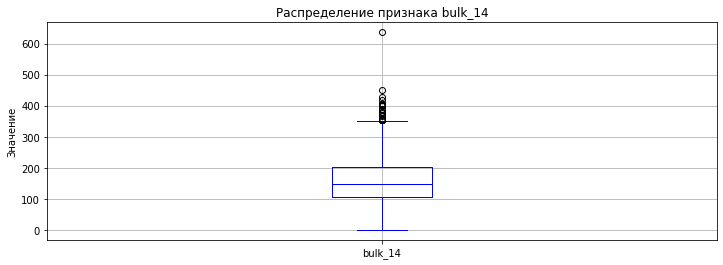

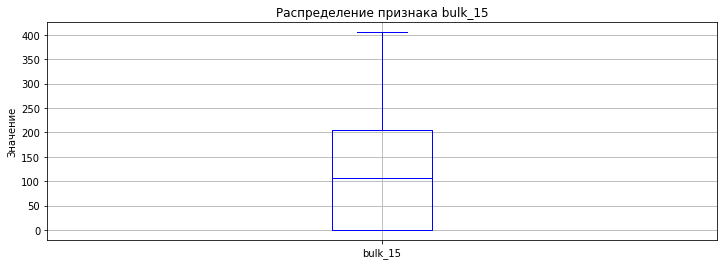

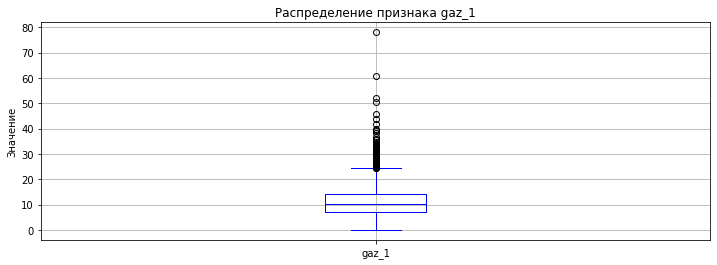

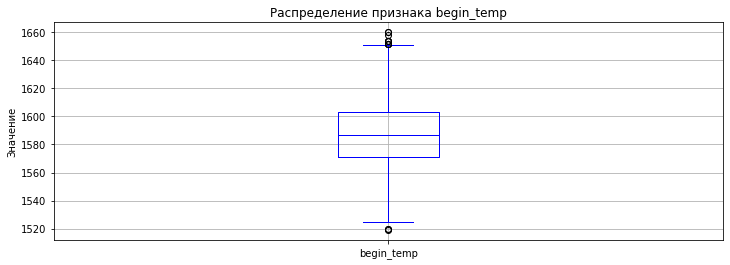

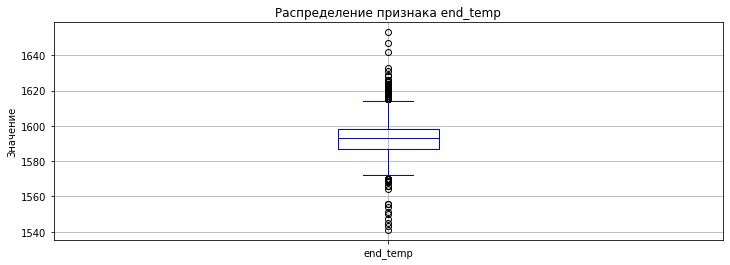

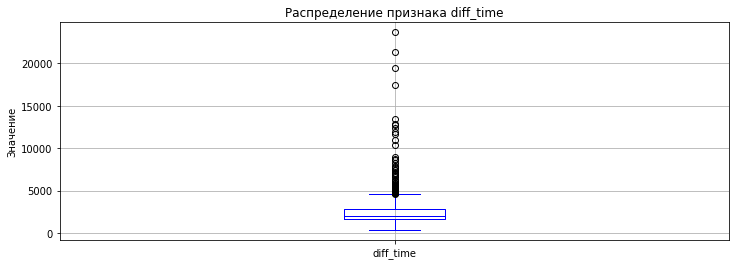

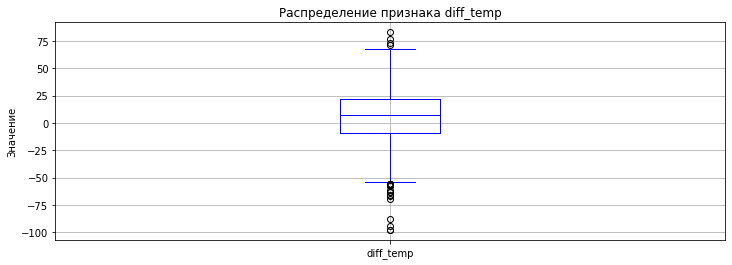

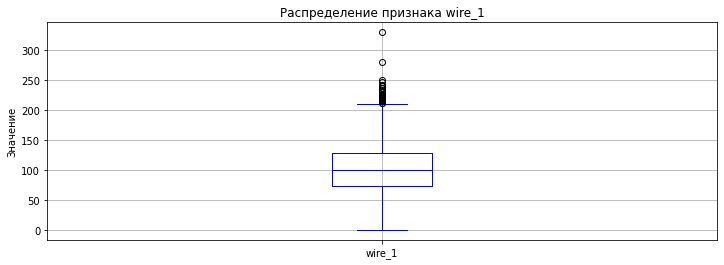

In [75]:
for i in data[['active_power', 'reactive_power', 'arc_heating_sec', 'full_power', 'energy', 'rounds', 'bulk_12', 'bulk_14', 'bulk_15', 'gaz_1', 'begin_temp', 'end_temp', 'diff_time', 'diff_temp', 'wire_1']]:
    data[i].plot(kind='box', grid=True, title= f'Распределение признака {i}', color='blue', figsize=(12,4));
    plt.ylabel('Значение')
    plt.show()

По распределению данных можно сказать, что данные распределены логично, выбросы незначительные. 

###  Проведем корреляционный анализ

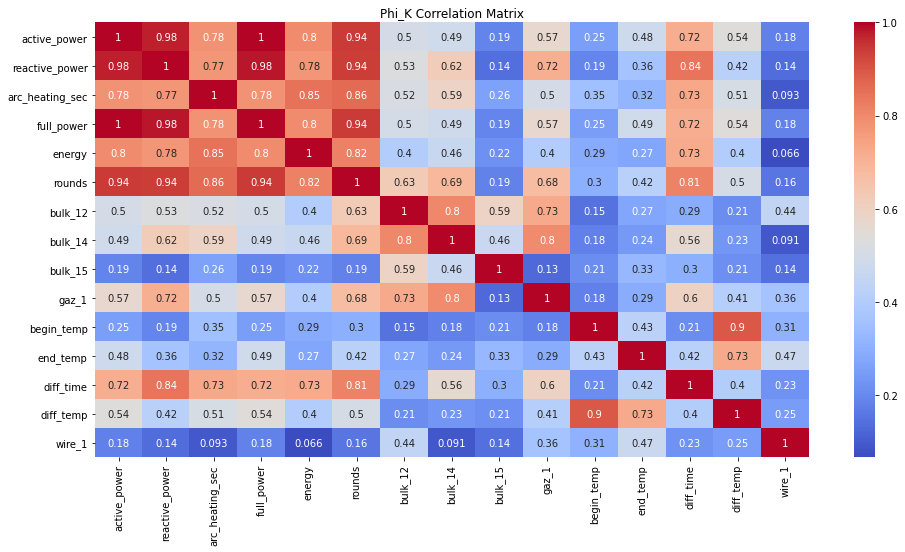

In [76]:
# Вычислим матрицу корреляции с использованием phik
corr_matrix = data.drop(['begin_time', 'end_time'], 
                        axis = 1).phik_matrix(interval_cols=['active_power', 
                                                             'reactive_power', 
                                                             'arc_heating_sec', 
                                                             'full_power', 
                                                             'energy', 
                                                             'bulk_12', 
                                                             'bulk_14', 
                                                             'bulk_15', 
                                                             'gaz_1', 
                                                             'begin_temp', 
                                                             'end_temp', 
                                                             'diff_time', 
                                                             'diff_temp', 
                                                             'wire_1'])
# Визуализируем матрицу корреляции
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Согласно получившейся матрицы корреляции следует, что высокая прямая связь наблюдается у признаков:
- `active_power` и `arc_heating_sec`
- `active_power` и `energy`
- `active_power` и `diff_time`
- `reactive_power` и `energy`
- `full_power` и `arc_heating_sec`
- `rounds` и `arc_heating_sec`
- `full_power` и `energy`
- `full_power` и `diff_time`
- `rounds` и `energy`
- `rounds` и `diff_time`
- `bulk_12` и `bulk_14`
- `bulk_12` и `bulk_15`
- `diff_temp` и `begin_temp`

Весьма высокая взаимосвязь наблюдается у признаков:
- `reactive_power` и `active_power`
- `rounds` и `active_power`
- `reactive_power` и `arc_heating_sec`
- `full_power` и `active_power`
- `energy` и `arc_heating_sec`
- `full_power` и `reactive_power`
- `rounds` и `reactive_power`
- `rounds` и `full_power`

Признаки с высокой корреляцией стоит учесть, так как многие линейные модели чувствительны к признакам с высокой корреляцией.

Целевой признак `end_temp` тесно коррелирует только с признаком `diff_temp`. Это может повлечь за собой утечку данных, при обучении моделей уберем данный признак. С остальными признакми прослеживается слабая взаимосвязь.

### Выводы по исследовательскому анализу и предобработки данных объединённого датафрейма

- Обработали пропуски в данных объединённого датафрейма
- Проверили данные объединённого датафрейма на наличие явных дубликатов
- Посмотрели на распределение данных объединённого датафрейма, из чего можно сказать, что данные распределены логично, выбросы незначительные
- Провели корреляционный анализ:
   - Выявлены признаки с высокой и весьма высокой взаимосвязью;
   - Целевой признак `end_temp` тесно коррелирует только с признаком `diff_temp`. Это может повлечь за собой утечку данных, при обучении моделей уберем данный признак. С остальными признакми прослеживается слабая взаимосвязь.


## Подготовка данных

На данном этапе необходимо выполнить подготовку данных для обучения модели. Разделить данные на две выборки, при масштабировании и кодировании учитывать особенности данных и моделей.

In [77]:
data.head()

,active_power,reactive_power,arc_heating_sec,full_power,energy,rounds,bulk_12,bulk_14,bulk_15,gaz_1,begin_time,end_time,begin_temp,end_temp,diff_time,diff_temp,wire_1
key,,,,,,,,,,,,,,,,,
1,3.036730,2.142821,1098,3.718736,770.282114,5,206.0,150.0,154.0,29.749986,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0,1714.0,42.0,60.059998
2,2.139408,1.453357,811,2.588349,481.760005,4,206.0,149.0,154.0,12.555561,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0,1265.0,21.0,96.052315
3,4.063641,2.937457,655,5.019223,722.837668,5,205.0,152.0,153.0,28.554793,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0,1753.0,3.0,91.160157
4,2.706489,2.056992,741,3.400038,683.455597,4,207.0,153.0,154.0,18.841219,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0,1220.0,24.0,89.063515
5,2.252950,1.687991,869,2.816980,512.169934,4,203.0,151.0,152.0,5.413692,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0,1536.0,26.0,89.238236


### Разделим данные на две выборки

In [78]:
features = data.drop(['end_time', 'begin_time', 'end_temp', 'diff_temp'], axis=1)
target = data['end_temp']

In [79]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, 
                                                                            test_size=TEST_SIZE, 
                                                                            random_state=RANDOM_STATE)

In [80]:
for i in [features_train, features_test, target_train, target_test]:
    print(i.shape)

(1743, 13)
(581, 13)
(1743,)
(581,)


### Масштабируем данные

In [81]:
scaler = StandardScaler()
columns = features.columns
# Обучим и преобразуем количественные признаки в тренировочной выборке
scaler_features_train = scaler.fit_transform(features_train[columns])
# Преобразуем количественные признаки в тестовой выборке
scaler_features_test = scaler.transform(features_test[columns])

In [82]:
# Выведем список новых столбцов после стандартизации
scaler_features_train = pd.DataFrame(scaler_features_train, columns=columns)
scaler_features_test = pd.DataFrame(scaler_features_test, columns=columns)

### Выводы по подготовке данных

- Из признаков были удалены целевой признак и два признака с типом данных `datetime64[ns]`, а также признак `diff_temp`, из-за которого возможна утечка данных;
- Выделили целевой признак;
- Разделили данные на тестовую и обучающую выборки в соотношении 1/4;
- Отмасштабировали данные с помощью StandardScaler. 

## Обучение моделей машинного обучения

На данном этапе необходимо обучить как минимум две модели. Хотя бы для одной из них подобрать как минимум два гиперпараметра.

### Обучение модели DecisionTreeRegressor

In [83]:
start = time()

DTR_model = DecisionTreeRegressor(random_state=RANDOM_STATE)
params = [{'criterion':['friedman_mse', 'poisson'],
           'min_samples_split': [2, 4, 8],
           'max_depth': (None, *range(2, 25))}]

DTR_grid = GridSearchCV(DTR_model, params, cv=5,  n_jobs=-1, scoring = 'neg_mean_absolute_error')
DTR_grid.fit(scaler_features_train, target_train)

print('Лучшие параметры модели DecisionTreeRegressor:\n\n', DTR_grid.best_params_)

DTR_result = abs(DTR_grid.best_score_)
print(f'MAE для лучшей модели DecisionTreeRegressor на CV: {DTR_result:.2f}')

end = time()
DTR_model_time = (end-start)
print(round(DTR_model_time,3),'сек')

Лучшие параметры модели DecisionTreeRegressor:

 {'criterion': 'poisson', 'max_depth': 4, 'min_samples_split': 4}
MAE для лучшей модели DecisionTreeRegressor на CV: 7.54
15.41 сек


### Обучение модели LGBMRegressor

In [84]:
start = time()

LGBMR_model = LGBMRegressor(random_state=RANDOM_STATE)
params = [{'num_leaves':[10, 15],
           'n_estimators': [10, 15],
           'learning_rate':[0.05, 0.1]}]

LGBMR_grid = GridSearchCV(LGBMR_model, params, cv=5, n_jobs=-1, scoring = 'neg_mean_absolute_error')
LGBMR_grid.fit(scaler_features_train, target_train)

print('Лучшие параметры модели LGBMRegressor:\n\n', LGBMR_grid.best_params_)

LGBMR_result = abs(LGBMR_grid.best_score_)
print(f'MAE для лучшей модели  LGBMRegressor на CV: {LGBMR_result:.2f}')

end = time()
LGBMR_model_time = (end-start)
print(round(LGBMR_model_time,3),'сек')

Лучшие параметры модели LGBMRegressor:

 {'learning_rate': 0.1, 'n_estimators': 15, 'num_leaves': 15}
MAE для лучшей модели  LGBMRegressor на CV: 6.83
10.32 сек


### Обучение модели CatBoostRegressor

In [85]:
start = time()

CBR_model = CatBoostRegressor(random_state=RANDOM_STATE)
params = [{'learning_rate':[0.1, 0.3, 0.5, 0.7],
           'verbose':[False]}]

CBR_grid = GridSearchCV(CBR_model, params,  n_jobs=-1, scoring = 'neg_mean_absolute_error')
CBR_grid.fit(scaler_features_train, target_train)

print('Лучшие параметры модели CatBoostRegressor:\n\n', CBR_grid.best_params_)

CBR_result = abs(CBR_grid.best_score_)
print(f'MAE для лучшей модели CatBoostRegressor на CV: {CBR_result:.2f}')

end = time()
CBR_model_time = (end-start)
print(round(CBR_model_time,3),'сек')

Лучшие параметры модели CatBoostRegressor:

 {'learning_rate': 0.1, 'verbose': False}
MAE для лучшей модели CatBoostRegressor на CV: 6.36
87.939 сек


### Обучение модели RandomForestRegressor

In [86]:
start = time()

RFR_model = RandomForestRegressor(random_state=RANDOM_STATE)
params = [{'n_estimators': [10, 30, 50],
          'max_depth': [1, 10],
          'min_samples_split': [2, 3, 4]}]

RFR_grid = RandomizedSearchCV(RFR_model, params, cv=3, scoring = 'neg_mean_absolute_error')
RFR_grid.fit(scaler_features_train, target_train)

print('Лучшие параметры модели RandomForestRegressor:\n\n', RFR_grid.best_params_)

RFR_result = abs(RFR_grid.best_score_)
print(f'MAE для лучшей модели RandomForestRegressor на CV: {RFR_result:.2f}')

end = time()
RFR_model_time = (end-start)
print(round(RFR_model_time,3),'сек')

Лучшие параметры модели RandomForestRegressor:

 {'n_estimators': 50, 'min_samples_split': 3, 'max_depth': 10}
MAE для лучшей модели RandomForestRegressor на CV: 6.42
6.394 сек


### Сравнение получившихся метрик моделей на обущающихся данных

In [87]:
print(f'MAE для лучшей модели DecisionTreeRegressor на CV: {DTR_result:.2f}')
print(f'MAE для лучшей модели  LGBMRegressor на CV: {LGBMR_result:.2f}')
print(f'MAE для лучшей модели CatBoostRegressor на CV: {CBR_result:.2f}')
print(f'MAE для лучшей модели RandomForestRegressor на CV: {RFR_result:.2f}')

MAE для лучшей модели DecisionTreeRegressor на CV: 7.54
MAE для лучшей модели  LGBMRegressor на CV: 6.83
MAE для лучшей модели CatBoostRegressor на CV: 6.36
MAE для лучшей модели RandomForestRegressor на CV: 6.42


### Выводы по обучению моделей

Были обучены следующие модели:
- DecisionTreeRegressor
- LGBMRegressor
- CatBoostRegressor
- RandomForestRegressor

Наилучшая метрика на обучающей выборке показала модель: CatBoostRegressor.

## Выбор лучшей модели

На данном этапе необходимо выбрать лучшую модель и проверить её качество на тестовой выборке.

### Проверим качество лучшей модели на тестовой выборке

In [88]:
%%time
CBR_model = CatBoostRegressor(random_state=RANDOM_STATE,
                              learning_rate = 0.1,
                              verbose = False)
CBR_model.fit(scaler_features_train, target_train)

CPU times: user 3.22 s, sys: 114 ms, total: 3.34 s
Wall time: 4.35 s


In [89]:
%%time
CBR_predict = CBR_model.predict(scaler_features_test)
CBR_MAE_test =  mean_absolute_error(target_test, CBR_predict)
print('MAE для модели CatBoostRegressor на тестовых данных', round(CBR_MAE_test, 3))

MAE для модели CatBoostRegressor на тестовых данных 5.891
CPU times: user 4.17 ms, sys: 82 µs, total: 4.25 ms
Wall time: 3.3 ms


**Значение метрики MAE  на тестовых данных составляет 5.891, следовательно, условие успеха MAE ≤ 6.8 на тестовой выборке, выполнено.**

### Проверим лучшую модель на адекватность

In [90]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(scaler_features_train, target_train)
pred_reg = dummy_regr.predict(scaler_features_test)
print(f'Метрика MAE модели DummyRegressor: {mean_absolute_error(target_test, pred_reg).round(3)}')

Метрика MAE модели DummyRegressor: 7.826


**Результат тестирования нашей модели на тествой выборке лучше, чем результат константной модели, что подтверждает адекватность лучшей модели.**

### Построим график важности признаков для модели CatBoostRegressor

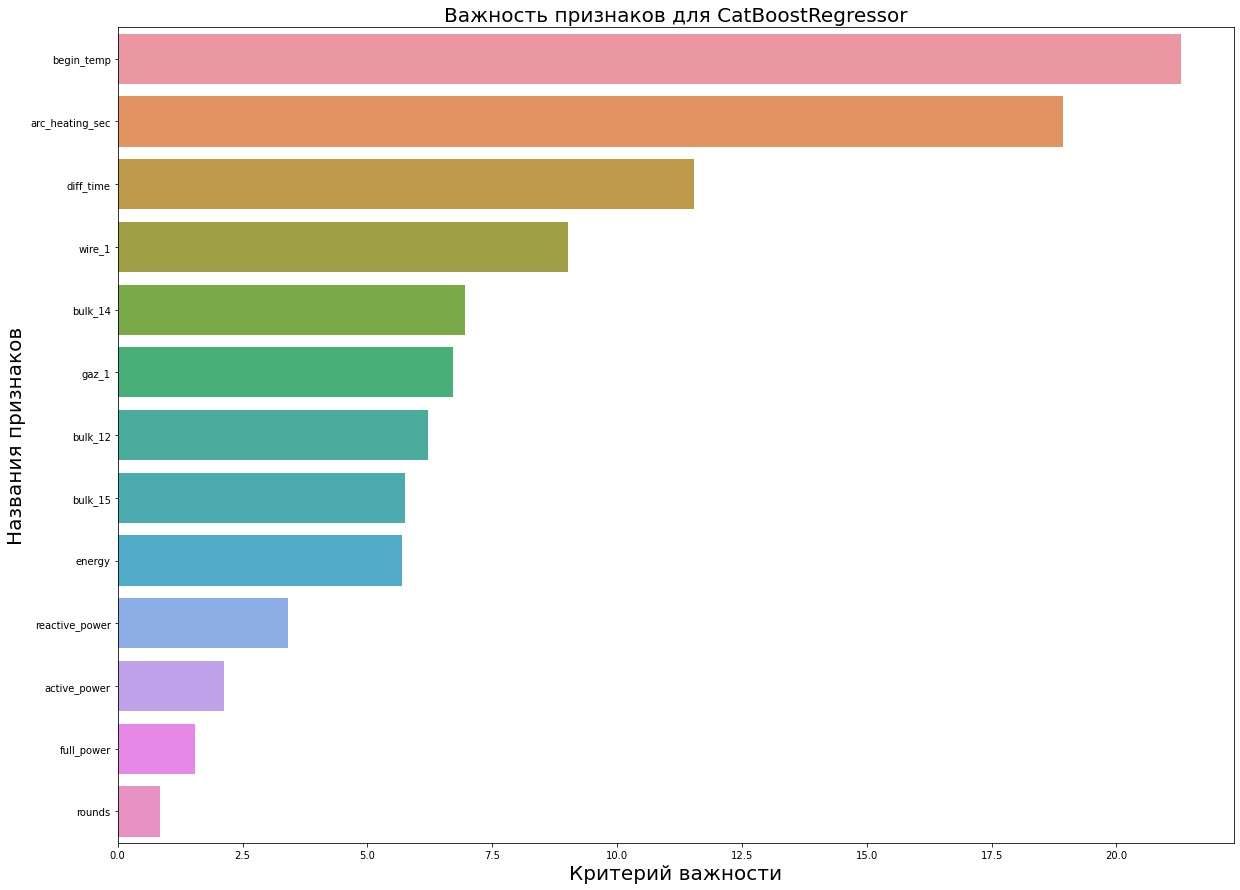

In [91]:
plot_data = {'features': scaler_features_test.columns,
             'feature_importance': CBR_model.feature_importances_}
plot_data = pd.DataFrame(plot_data)
plot_data.sort_values(by='feature_importance', ascending=False, inplace=True)
plt.figure(figsize=(20, 15))
sns.barplot(x=plot_data['feature_importance'], y=plot_data['features'])
plt.title('Важность признаков для CatBoostRegressor', fontsize=20)
plt.xlabel('Критерий важности', fontsize=20)
plt.ylabel('Названия признаков', fontsize=20)
plt.show()

- По графику важности получилось, что наиболее важными признаками для прогнозирования конечной температуры нагрева оказались: начальная температура сплава, время окончания нагрева.
- Далее по важности идут признаки: разница времени в секундах первого и последнего замера раундов одной партии, объем подаваемого материала, время подачи проволочных материалов.

### Выводы по анализу лучшей модели

- Значение метрики MAE  на тестовых данных составляет 5.891, следовательно, условие успеха MAE ≤ 6.8 на тестовой выборке, выполнено.
- Результат тестирования нашей модели на тествой выборке лучше, чем результат константной модели, что подтверждает адекватность лучшей модели.
- По графику важности получилось, что наиболее важными признаками для прогнозирования конечной температуры нагрева оказались: начальная температура сплава, разница температур спалва первого и последнего замера раундов одной партии.
- Далее по важности идут признаки: объем подаваемого материала, время подачи проволочных материалов и время окончания нагрева.

## Общий вывод и рекомендации заказчику

На данном этапе необходимо сделать общий вывод о проделанной работе.

<font color='blue'>**Выводы по загрузке и изучению данных**</font>

По первичному осмотру данных, выявлены:
- неверные типы данных у признаков 
- некорректные наименования признаков
- пропуски
- неинформативные данные, в таблицах `data_bulk_time` и `data_wire_time`, которые содержат только значения времени подачи материала

<font color='blue'>**Выводы по исследовательскому анализу и предобработке данных**</font>

В ходе исследовательского анализа и предобработки данных были получены следующие результаты:
- Отброшены датафреймы `data_bulk_time` и `data_wire_time`, поскольку данные в них не несут ценной для задачи информации.
- Привели названия столбцов к стандартному виду.
- Обработаны пропуски в данных:
  - Оставлены столбцы `bulk_12`, `bulk_14`, `bulk_15`. Пропущенные значения в данных столбцах заменили на 0. Остальные столбцы удалили, так как количество пропущенных значений в них превышает половину и не несут нужной информации.
  - Пропусков в столбце со значениями температуры получилось 18,94%. Заменить данные пропуски медианным, средним значением или нулем нецелесообразно. Поэтому, приняла решение - удалить строки с пропусками.
  - Оставлен столбец `wire_1`. Пропущенные значения в данном столбце заменили на 0. Остальные столбцы удалили, так как количество пропущенных значений в них превышает половину и не несут нужной информации.
- Преобразовали данные в нужные типы.
- Проверили данные на наличие явных дубликатов.
- Введели новые признаки:
  - `rc_heating_sec` -  общее время нагрева в секундах;
  - `full_power` - полная мощность;
  - `energy` - энергия;
  - `rounds` - количество раундов в одной партии;
  - `begin_time` -  значения времени первого замера раундов одной партии;
  - `end_time` - значения последнего замера раундов одной партии;
  - `diff_time` - разница времени в секундах первого и последнего замера раундов одной партии;
  - `begin_temp` - значения температуры первого замера раундов одной партии;
  - `end_temp` - значения температуры последнего замера раундов одной партии (целевой признак);
  - `diff_temp` - разница температур первого и последнего замера раундов одной партии.
- Посмотрели на распределение данных:
  - По распределению признака `reactive_power`, отметили выброс со значением -715.479924. Удалили строку с данным значением.
   - По распределению признака `temp`, отметили аномальные значения меньше 1400. Удалили строки с данными значениями.
  - Значения `begin_temp` и `end_temp` совпадают, а значения `diff_time` и `diff_temp` вовсе равны 0. Удалили строки с данными значениями.
  - Остальные выбросы пока оставили, их значения не слишком аномально высокие. Возможно, для последующего обучения моделей, данные выбросы позволят не переобучиться и учитывать такие нюасы.

<font color='blue'>**Выводы по объединению данных**</font>

- Были объеденены в один датасет `data` следующие датасеты по ключевому признаку `key`: `data_arc`, `data_bulk`, `data_gas`, `data_temp`, `data_wire`.
- Были отмечены пропуски в данных, в дальнейшем избавимся от них.

<font color='blue'>**Выводы по исследовательскому анализу и предобработки данных объединённого датафрейма**</font>

- Обработали пропуски в данных объединённого датафрейма
- Проверили данные объединённого датафрейма на наличие явных дубликатов
- Посмотрели на распределение данных объединённого датафрейма, из чего можно сказать, что данные распределены логично, выбросы незначительные
- Провели корреляционный анализ:
   - Выявлены признаки с высокой и весьма высокой взаимосвязью;
   - Целевой признак `end_temp` тесно коррелирует только с признаком `diff_temp`. Это может повлечь за собой утечку данных, при обучении моделей уберем данный признак. С остальными признакми прослеживается слабая взаимосвязь.

<font color='blue'>**Выводы по подготовке данных**</font>

- Из признаков были удалены целевой признак и два признака с типом данных `datetime64[ns]`, а также признак `diff_temp`, из-за которого возможна утечка данных;
- Выделили целевой признак;
- Разделили данные на тестовую и обучающую выборки в соотношении 1/4;
- Отмасштабировали данные с помощью StandardScaler.  

<font color='blue'>**Выводы по обучению моделей**</font>

Были обучены следующие модели:
- DecisionTreeRegressor
- LGBMRegressor
- CatBoostRegressor
- RandomForestRegressor

Наилучшая метрика на обучающей выборке показала модель: CatBoostRegressor.

<font color='blue'>**Выводы по анализу лучшей модели**</font>

- Значение метрики MAE  на тестовых данных составляет 5.891, следовательно, условие успеха MAE ≤ 6.8 на тестовой выборке, выполнено.
- Результат тестирования нашей модели на тествой выборке лучше, чем результат константной модели, что подтверждает адекватность лучшей модели.
- По графику важности получилось, что наиболее важными признаками для прогнозирования конечной температуры нагрева оказались: начальная температура сплава, время окончания нагрева.
- Далее по важности идут признаки: разница времени в секундах первого и последнего замера раундов одной партии, объем подаваемого материала, время подачи проволочных материалов.

<font color='blue'>**Рекомендации заказчику**</font>

*Исходя из получившихся данных, заказчику стоит порекомендовать следить за конечной температурой сплава. Для этого стоит обращать особое внимание на начальную температуру нагрева сплава, также стоит уделить внимание разнице начальной и конечной температур одной партии. Температура должна быть не менее 1400, так как ниже уже начинается процесс кристаллизации, но и лишний перегрев нежелателен, это лишь приведет к дополнительным затратам по электричеству. Необходимо придерживать оптимальную температуру плавления, при которой достигается необходимый результат сплава.*